# Figure 4.1 to 4.5

## Figure 4.1, 4.2, and 4.3

Steady states and phase plots in an assymetric network

In [1]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays
using Setfield

using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
function model!(du, u, p, t)
    @unpack K1, K2, K3, K4, K5, N = p
    @unpack A, B = u
    
    v1 = K1 * hill(1, B, N)
    v5 = K5 * A
    
    du.A = v1 - v5 - K3 * A
    du.B = K2 + v5 - K4 * B
end

model! (generic function with 1 method)

In [4]:
params = (K1=20.0, K2=5.0, K3=5.0, K4=5.0, K5=2.0, N=4)

u0s = (LVector(A=0.0, B=0.0), 
       LVector(A=0.5, B=0.6),
       LVector(A=0.17, B=1.1),
       LVector(A=0.25, B=1.9),
       LVector(A=1.85, B=1.70))

sols = map(u0 -> solve(ODEProblem(model!, u0, 1.5, params)), u0s);

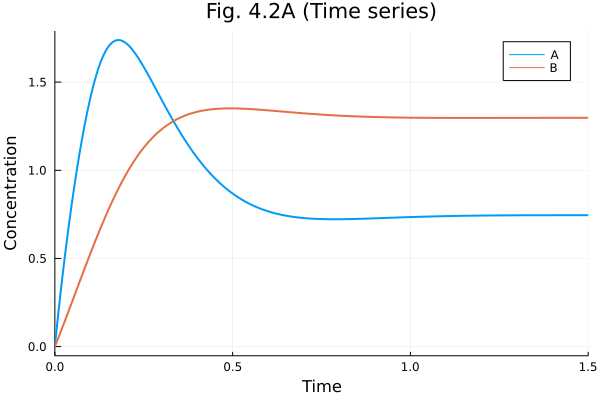

In [5]:
plot(sols[1], xlabel="Time", ylabel="Concentration", title="Fig. 4.2A (Time series)")

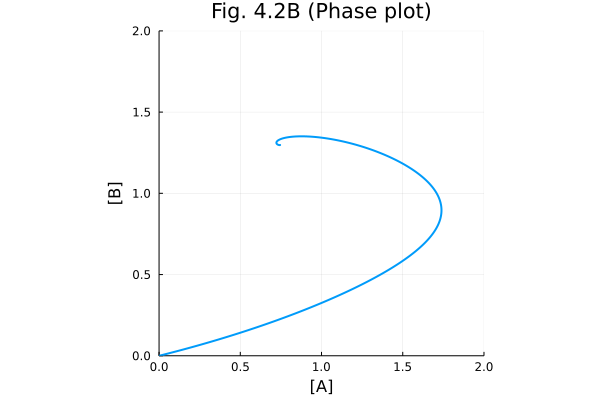

In [6]:
plot(sols[1], vars=(1, 2), xlabel="[A]", ylabel="[B]", aspect_ratio=:equal,
     title="Fig. 4.2B (Phase plot)", ylims=(0.0, 2.0), xlims=(0.0, 2.0), 
     legend=nothing)

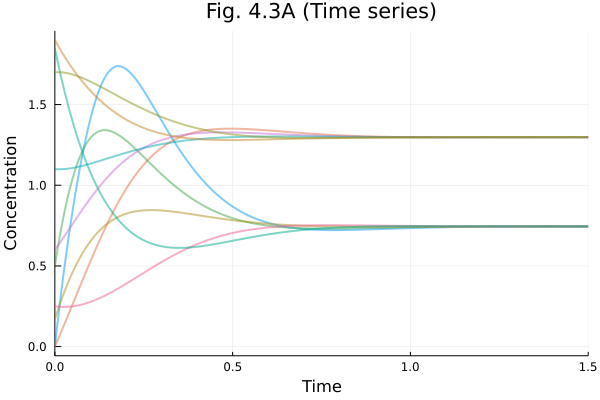

In [7]:
p3 = plot()
	
for sol in sols
    plot!(p3, sol, linealpha=0.5, legend = nothing)
end

plot!(p3, xlabel="Time", ylabel="Concentration", title="Fig. 4.3A (Time series)")

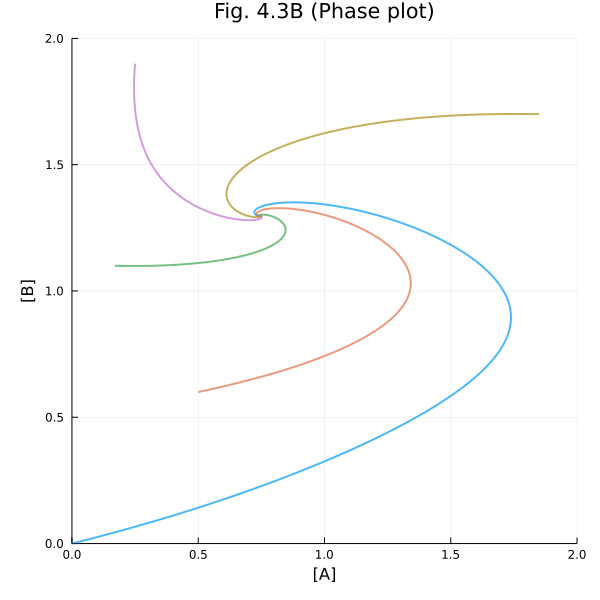

In [8]:
p4 = plot()
for sol in sols
    plot!(p4, sol, vars=(1, 2), linealpha=0.7, legend = nothing)
end
plot!(p4, aspect_ratio=:equal, title="Fig. 4.3B (Phase plot)", xlabel="[A]", ylabel="[B]", ylims=(0.0, 2.0), xlims=(0.0, 2.0), size=(600, 600))

## Figure 4.4, 4.5 

Vector fields

In [9]:
# Nullclines
nullcline_a(b, p) = p.K1 / (p.K5 + p.K4)  * hill(1, b, p.N)
nullcline_a(b) = nullcline_a(b, params)
nullcline_b(b, p) = (p.K4*b - p.K2) / p.K5
nullcline_b(b) = nullcline_b(b, params)

nullcline_b (generic function with 2 methods)

In [10]:
# function for vector field
function df(x, y, p = params, scale=20)
	u = LVector(A=x, B=y)
	du = similar(u)
	model!(du, u, p, 0.0)
	return du ./ (norm(du)^0.5 * scale)
end

df (generic function with 3 methods)

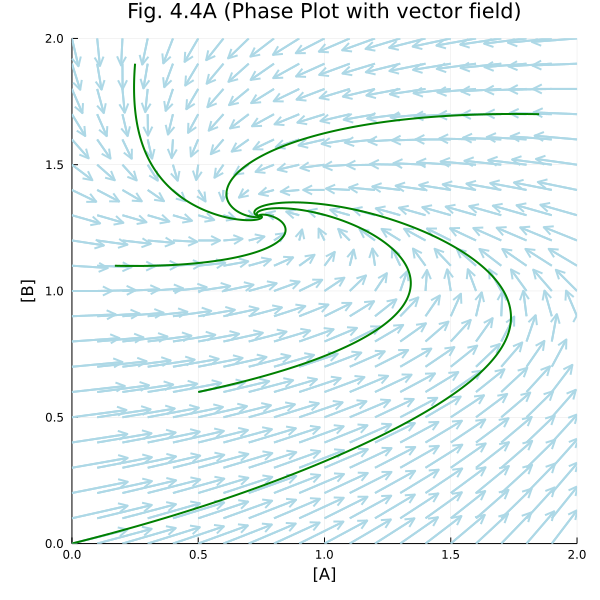

In [11]:
xx = [x for y in 0.0:0.1:2.0, x in 0.0:0.1:2.0]
yy = [y for y in 0.0:0.1:2.0, x in 0.0:0.1:2.0]
p1 = quiver(xx, yy, quiver=df, line=(:lightblue))

for sol in sols
    plot!(p1, sol, vars=(1, 2), legend = nothing, line=(:green))
end

plot!(p1, aspect_ratio=:equal, title="Fig. 4.4A (Phase Plot with vector field)", 
  xlabel="[A]", ylabel="[B]", xlim=(0.0, 2.0), ylim=(0.0, 2.0), size=(600, 600))

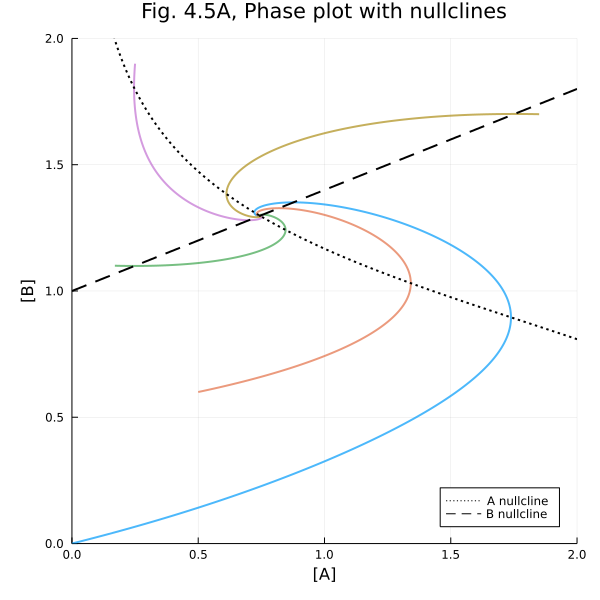

In [12]:
# Figure 4.5A
p45a = plot(aspect_ratio=:equal, title="Fig. 4.5A, Phase plot with nullclines")

# Phase plots
for sol in sols
    plot!(p45a, sol, vars=(1, 2), linealpha=0.7, lab=nothing)
end

# Parametric plotting for nullcline
plot!(p45a, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45a, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45a, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[A]", ylabel="[B]")

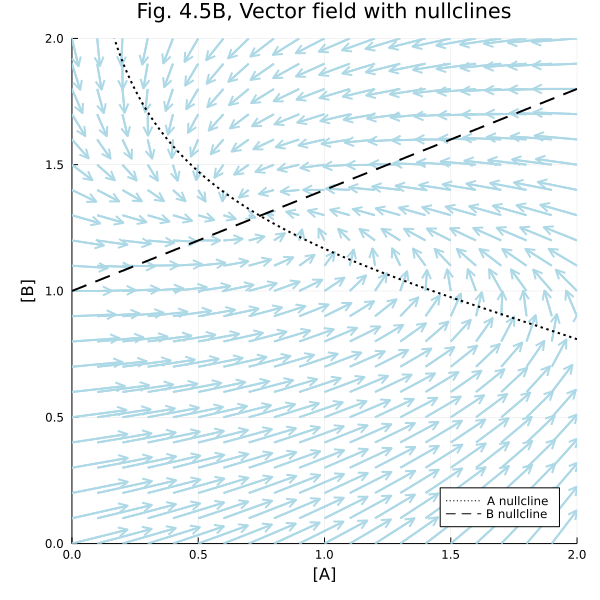

In [13]:
p45b = quiver(xx, yy, quiver=df, line=(:lightblue), title="Fig. 4.5B, Vector field with nullclines", xlabel="[A]", ylabel="[B]")
plot!(p45b, nullcline_a, identity, 0.0, 2.0, label="A nullcline", line=(:black, :dot))
plot!(p45b, nullcline_b, identity, 0.0, 2.0, label="B nullcline", line=(:black, :dash))
plot!(p45b, aspect_ratio=1.0, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600))